In [2]:
import pandas as pd
import numpy as np
import scipy.stats.mstats as winsorize
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [6]:
eğitim = pd.read_csv("eğitimdolu.csv")
eğitim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 26 columns):
Unnamed: 0                      1492 non-null int64
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1492 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1492 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      149

In [7]:
eğitim.isnull().sum()*100/eğitim.shape[0]

Unnamed: 0                      0.0
PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

# Ödev1
Toplam gelir verilerini içeren TOTAL_REVENUE ve toplam harcama verilerini içeren TOTAL_EXPENDITURE değişkenlerini inceleyin. Bu değişkenler aykırı değerler içeriyor mu?

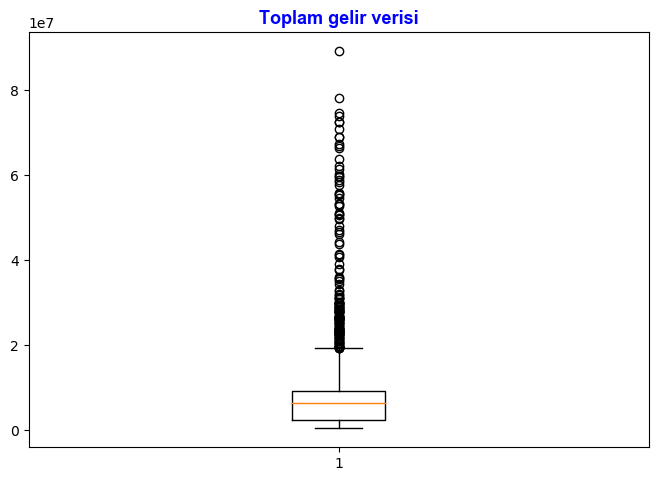

In [8]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

baslik_font={"family":"arial","color":"blue","weight":"bold","size":13}
eksen_font={"family":"arial","color":"darkred","weight":"bold","size":11}


plt.boxplot(eğitim["TOTAL_REVENUE"])
plt.title("Toplam gelir verisi", fontdict=baslik_font)
plt.show()

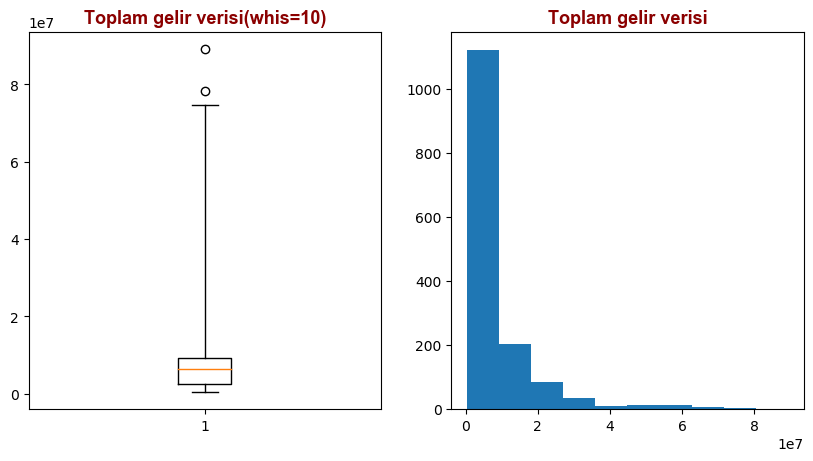

In [15]:
plt.subplot(1,2,1)
plt.boxplot(eğitim["TOTAL_REVENUE"], whis=10 )
plt.title("Toplam gelir verisi(whis=10)", fontdict=baslik_font)
plt.subplot(1,2,2)
plt.hist(eğitim["TOTAL_REVENUE"])
plt.title("Toplam gelir verisi", fontdict=baslik_font)
plt.show()

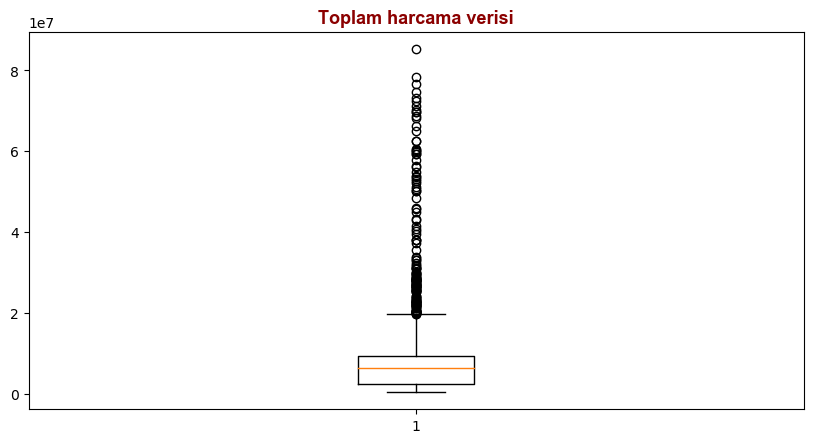

In [10]:
plt.rcParams["figure.dpi"]=100
plt.rcParams["figure.figsize"]=(10,5)

baslik_font={"family":"arial","color":"darkred","weight":"bold","size":13}
eksen_font={"family":"arial","color":"darkblue","weight":"bold","size":11}


plt.boxplot(eğitim["TOTAL_EXPENDITURE"] )
plt.title("Toplam harcama verisi", fontdict=baslik_font)
plt.show()

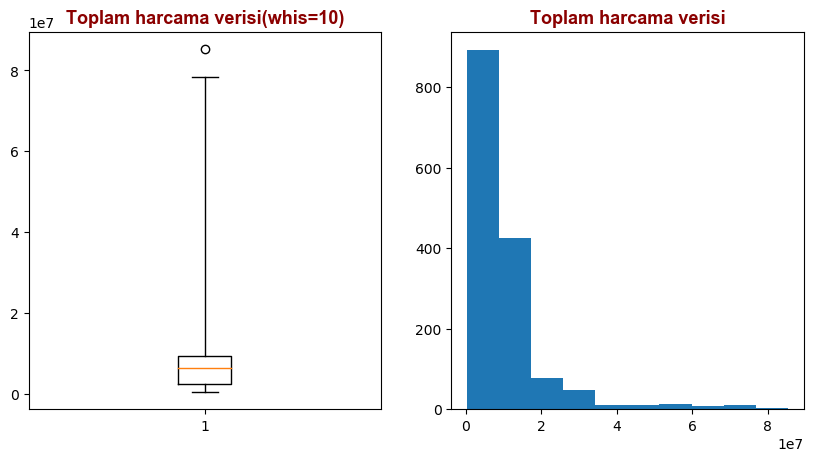

In [16]:
plt.subplot(1,2,1)
plt.boxplot(eğitim["TOTAL_EXPENDITURE"], whis=10 )
plt.title("Toplam harcama verisi(whis=10)", fontdict=baslik_font)
plt.subplot(1,2,2)
plt.hist(eğitim["TOTAL_EXPENDITURE"])
plt.title("Toplam harcama verisi", fontdict=baslik_font)
plt.show()

görüldüğü üzere her iki sütunda da aykırı değerler bulunmaktadır. whis 10 yaptığımızda aykırı değerler azalmaktadır.

# ÖDEV 2
Toplam gelir (TOTAL_REVENUE) ve toplam harcama (TOTAL_EXPENDITURE) değişkenlerinde aykırı değer tespit ettiyseniz bu derste öğrendiğiniz teknikleri uygulayarak bu aykırı değerleri ortadan kaldırın ve bunu yaptıktan sonra hiçbir aykırı değer kalmadığını doğrulayın.

In [17]:
from scipy.stats.mstats import winsorize

winsorize_TOTAL_REVENUE = winsorize(eğitim["TOTAL_REVENUE"], (0, 0.10))

winsorize_TOTAL_REVENUE

masked_array(data=[2678885.        , 1049591.        , 3258079.        ,
                   ..., 9279620.66314076, 9279620.66314076,
                   9279620.66314076],
             mask=False,
       fill_value=1e+20)

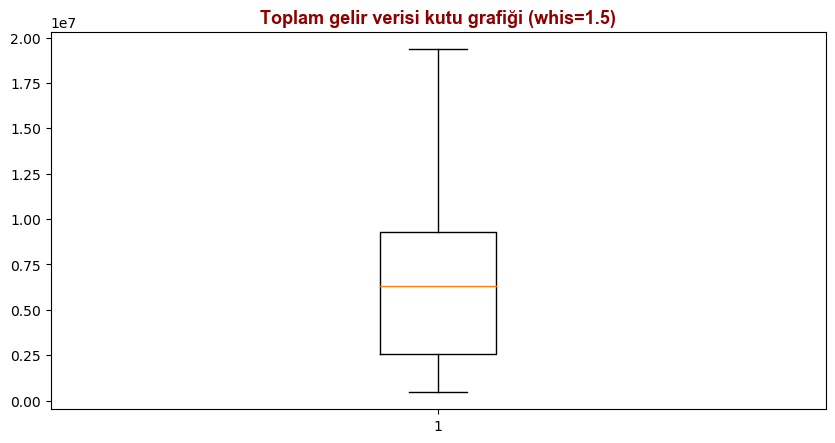

In [18]:
plt.boxplot(winsorize_TOTAL_REVENUE)
plt.title("Toplam gelir verisi kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

In [20]:
from scipy.stats.mstats import winsorize

winsorize_TOTAL_EXPENDITURE = winsorize(eğitim["TOTAL_EXPENDITURE"], (0, 0.10))

winsorize_TOTAL_EXPENDITURE

masked_array(data=[2653798.        ,  972488.        , 3401580.        ,
                   ..., 9385206.15866558, 9385206.15866558,
                   9385206.15866558],
             mask=False,
       fill_value=1e+20)

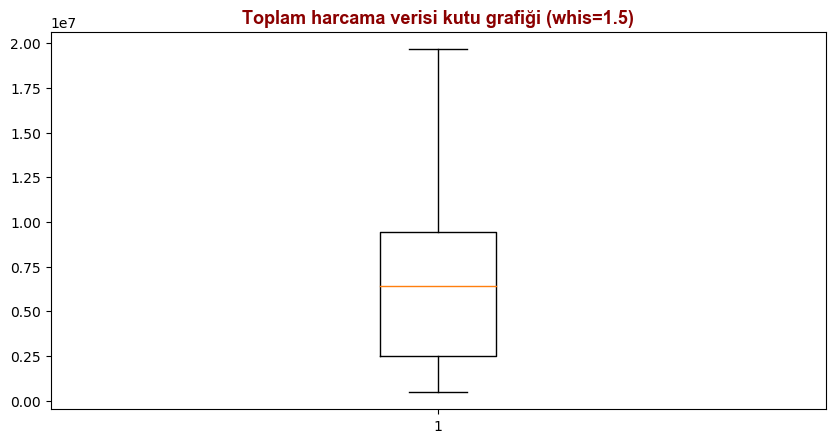

In [21]:
plt.boxplot(winsorize_TOTAL_EXPENDITURE)
plt.title("Toplam harcama verisi kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

görüldüğü üzere iki sütununda %10 oranında winzorize ederek aykırı değerlerden kurtulduk.

# ÖDEV3
Toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama (TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun (aykırı değerleri temezlemeden). Bu yeni değişkende de aykırı değerler yer almakta mı? Varsa bu aykırı değerleri de temizleyin.

In [24]:
eğitim["BÜTÇE_AÇIĞI"]=eğitim["TOTAL_REVENUE"]-eğitim["TOTAL_EXPENDITURE"]
eğitim.head(5)

,Unnamed: 0,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,BÜTÇE_AÇIĞI
0,0,1992_ALABAMA,ALABAMA,1992,920139.299884,2678885.0,304177.0,1659028.0,715680.0,2653798.0,...,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.307067,25087.0
1,1,1992_ALASKA,ALASKA,1992,920139.299884,1049591.0,106780.0,720711.0,222100.0,972488.0,...,8789.0,6714.0,79117.0,30847.0,112335.0,218.410116,266.360319,212.712256,258.859712,77103.0
2,2,1992_ARIZONA,ARIZONA,1992,920139.299884,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,...,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895,-143501.0
3,3,1992_ARKANSAS,ARKANSAS,1992,920139.299884,1711959.0,178571.0,958785.0,574603.0,1743022.0,...,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665,-31063.0
4,4,1992_CALIFORNIA,CALIFORNIA,1992,920139.299884,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,...,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.307067,-878807.0


In [37]:
aykırı_deger_sayısı=zscore(eğitim["BÜTÇE_AÇIĞI"])
for eşik in np.arange(1,5):
    print("Eşik değeri :{}".format(eşik))
    print("Aykırı değer sayısı :{}".format(len(np.where(aykırı_deger_sayısı>eşik)[0])))
    print("----------------------")

Eşik değeri :1
Aykırı değer sayısı :76
----------------------
Eşik değeri :2
Aykırı değer sayısı :22
----------------------
Eşik değeri :3
Aykırı değer sayısı :7
----------------------
Eşik değeri :4
Aykırı değer sayısı :3
----------------------


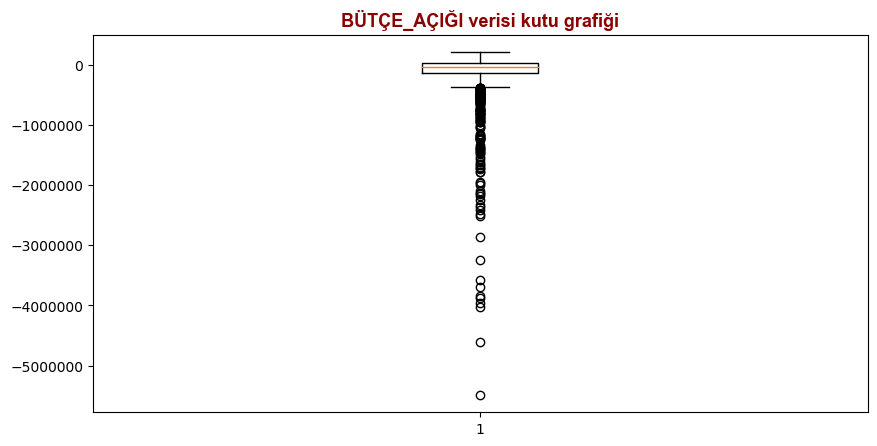

In [38]:
winsorize_BÜTÇE_AÇIĞI = winsorize(eğitim["BÜTÇE_AÇIĞI"], (0, 0.10))

winsorize_BÜTÇE_AÇIĞI

plt.boxplot(winsorize_BÜTÇE_AÇIĞI)
plt.title("BÜTÇE_AÇIĞI verisi kutu grafiği", fontdict=baslik_font)
plt.show()

In [42]:
aykırı_deger_sayısı=zscore(winsorize_BÜTÇE_AÇIĞI)
for eşik in np.arange(1,5):
    print("Eşik değeri :{}".format(eşik))
    print("Aykırı değer sayısı :{}".format(len(np.where(aykırı_deger_sayısı>eşik)[0])))
    print("----------------------")

Eşik değeri :1
Aykırı değer sayısı :0
----------------------
Eşik değeri :2
Aykırı değer sayısı :0
----------------------
Eşik değeri :3
Aykırı değer sayısı :0
----------------------
Eşik değeri :4
Aykırı değer sayısı :0
----------------------


# Ödev 4
Yine toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama(TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun. Fakat bu sefer aykırı değerleri temezledikten sonra bu işlemi yapın. Bu yeni değişkende de aykırı değerler var mı? Varsa bunları da temizlemekte fayda var.

In [52]:
eğitim["BÜTÇE_AÇIĞI2"]=winsorize_TOTAL_REVENUE-winsorize_TOTAL_EXPENDITURE
eğitim.head(5)

,Unnamed: 0,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,...,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,BÜTÇE_AÇIĞI,WİN_BÜTÇE_AÇIĞI,BÜTÇE_AÇIĞI2
0,0,1992_ALABAMA,ALABAMA,1992,920139.299884,2678885.0,304177.0,1659028.0,715680.0,2653798.0,...,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.307067,25087.0,25087.0,25087.0
1,1,1992_ALASKA,ALASKA,1992,920139.299884,1049591.0,106780.0,720711.0,222100.0,972488.0,...,79117.0,30847.0,112335.0,218.410116,266.360319,212.712256,258.859712,77103.0,77103.0,77103.0
2,2,1992_ARIZONA,ARIZONA,1992,920139.299884,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,...,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895,-143501.0,-143501.0,-143501.0
3,3,1992_ARKANSAS,ARKANSAS,1992,920139.299884,1711959.0,178571.0,958785.0,574603.0,1743022.0,...,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665,-31063.0,-31063.0,-31063.0
4,4,1992_CALIFORNIA,CALIFORNIA,1992,920139.299884,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,...,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.307067,-878807.0,-306344.0,-306344.0


In [53]:
aykırı_deger_sayısı=zscore(eğitim["BÜTÇE_AÇIĞI2"])
for eşik in np.arange(1,5):
    print("Eşik değeri :{}".format(eşik))
    print("Aykırı değer sayısı :{}".format(len(np.where(aykırı_deger_sayısı>eşik)[0])))
    print("----------------------")

Eşik değeri :1
Aykırı değer sayısı :118
----------------------
Eşik değeri :2
Aykırı değer sayısı :42
----------------------
Eşik değeri :3
Aykırı değer sayısı :20
----------------------
Eşik değeri :4
Aykırı değer sayısı :12
----------------------


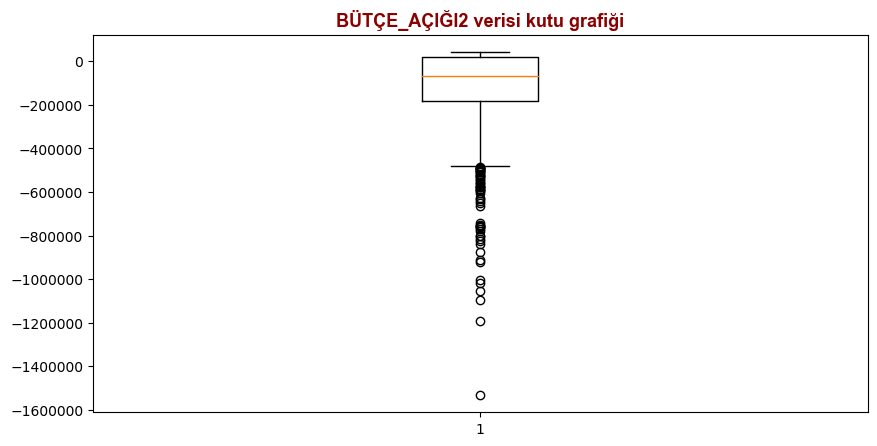

In [55]:
winsorize_BÜTÇE_AÇIĞI2 = winsorize(eğitim["BÜTÇE_AÇIĞI2"], (0, 0.20))

winsorize_BÜTÇE_AÇIĞI2

plt.boxplot(winsorize_BÜTÇE_AÇIĞI2)
plt.title("BÜTÇE_AÇIĞI2 verisi kutu grafiği", fontdict=baslik_font)
plt.show()

In [56]:
aykırı_deger_sayısı=zscore(winsorize_BÜTÇE_AÇIĞI2)
for eşik in np.arange(1,5):
    print("Eşik değeri :{}".format(eşik))
    print("Aykırı değer sayısı :{}".format(len(np.where(aykırı_deger_sayısı>eşik)[0])))
    print("----------------------")

Eşik değeri :1
Aykırı değer sayısı :0
----------------------
Eşik değeri :2
Aykırı değer sayısı :0
----------------------
Eşik değeri :3
Aykırı değer sayısı :0
----------------------
Eşik değeri :4
Aykırı değer sayısı :0
----------------------


# ÖDEV5
Şimdi elimizde üçüncü ve ve dördüncü sorularda oluşturduğumuz iki farklı bütçe değişkeni var. Bu ikisi arasında fark görüyor musunuz?

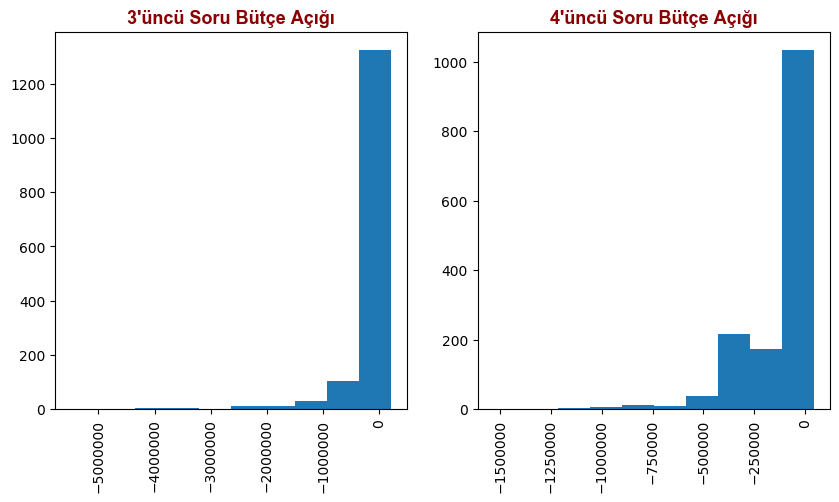

In [61]:
plt.subplot(1,2,1)
plt.hist(winsorize_BÜTÇE_AÇIĞI)
plt.title("3'üncü Soru Bütçe Açığı", fontdict=baslik_font)
plt.xticks(rotation="vertical")
plt.subplot(1,2,2)
plt.hist(winsorize_BÜTÇE_AÇIĞI2)
plt.title("4'üncü Soru Bütçe Açığı", fontdict=baslik_font)
plt.xticks(rotation="vertical")
plt.show()

iki histogram incelendiğinde aykırı değerler temzilendikten sonra elde edilen bütçe açığı
birbirine yakın değerleri daha fazla içermektedir.

# ÖDEV6
Bizim için bütçe açığı çok önemli bir değişken olsaydı aykırı değerleri temizlemek için hangi yöntem daha iyi olurdu. Üçüncü soruda uguladığınız yöntem mi yoksa dördüncü sorudaki yöntem mi?

CVP:4'ncü sorudaki yöntem daha anlamlı olurdu, çünkü 3'ncü sorudaki yönteme göre veriler dağınık veriler daha fazla.